<a href="https://colab.research.google.com/github/irakibul7/machine-learning-project/blob/master/covid19test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/master/metadata.csv")

In [77]:
df.head(10)

,Patientid,offset,sex,age,finding,survival,view,modality,date,location,filename,doi,url,license,clinical notes,other notes,Unnamed: 16
0,2,0.0,M,65.0,COVID-19,Y,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,infiltrate in the upper lobe of the left lung,NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN
5,4,5.0,F,52.0,COVID-19,NaN,PA,X-ray,"January 30, 2020","Changhua Christian Hospital, Changhua City, Ta...",nejmc2001573_f1b.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive diffuse interstitial opacities and...,NaN,NaN
6,5,NaN,NaN,NaN,ARDS,NaN,PA,X-ray,2017,NaN,ARDSSevere.png,NaN,https://en.wikipedia.org/wiki/File:ARDSSevere.png,NaN,Severe ARDS. Person is intubated with an OG in...,NaN,NaN
7,6,0.0,NaN,NaN,COVID-19,NaN,PA,X-ray,2020,"Wuhan Jinyintan Hospital, Wuhan, Hubei Provinc...",lancet-case2a.jpg,10.1016/S0140-6736(20)30211-7,https://www.thelancet.com/journals/lancet/arti...,NaN,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,NaN,NaN
8,6,4.0,NaN,NaN,COVID-19,NaN,PA,X-ray,2020,"Wuhan Jinyintan Hospital, Wuhan, Hubei Provinc...",lancet-case2b.jpg,10.1016/S0140-6736(20)30211-7,https://www.thelancet.com/journals/lancet/arti...,NaN,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,NaN,NaN
9,3,4.0,M,74.0,SARS,N,PA,X-ray,2004,"Mount Sinai Hospital, Toronto, Ontario, Canada",SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....,10.1148/rg.242035193,https://pubs.rsna.org/doi/10.1148/rg.242035193,NaN,SARS in a 74-year-old man who developed sympto...,NaN,NaN


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 17 columns):
Patientid         178 non-null int64
offset            139 non-null float64
sex               160 non-null object
age               152 non-null float64
finding           178 non-null object
survival          73 non-null object
view              178 non-null object
modality          178 non-null object
date              178 non-null object
location          139 non-null object
filename          178 non-null object
doi               77 non-null object
 url              178 non-null object
license           56 non-null object
clinical notes    176 non-null object
other notes       102 non-null object
Unnamed: 16       1 non-null object
dtypes: float64(2), int64(1), object(14)
memory usage: 23.8+ KB


In [79]:
df.isnull().sum()

Patientid           0
offset             39
sex                18
age                26
finding             0
survival          105
view                0
modality            0
date                0
location           39
filename            0
doi               101
 url                0
license           122
clinical notes      2
other notes        76
Unnamed: 16       177
dtype: int64

In [80]:
df['survival'].value_counts()

Y    63
N    10
Name: survival, dtype: int64

In [0]:
new_df = df.dropna(subset = ['survival'])

In [82]:
new_df.shape

(73, 17)

In [83]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 174
Data columns (total 17 columns):
Patientid         73 non-null int64
offset            72 non-null float64
sex               69 non-null object
age               67 non-null float64
finding           73 non-null object
survival          73 non-null object
view              73 non-null object
modality          73 non-null object
date              73 non-null object
location          59 non-null object
filename          73 non-null object
doi               51 non-null object
 url              73 non-null object
license           20 non-null object
clinical notes    73 non-null object
other notes       24 non-null object
Unnamed: 16       0 non-null object
dtypes: float64(2), int64(1), object(14)
memory usage: 10.3+ KB


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [85]:
new_df['survival'] = new_df['survival'].map({'N': 0, 'Y': 1})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
new_df.head(5)

,Patientid,offset,sex,age,finding,survival,view,modality,date,location,filename,doi,url,license,clinical notes,other notes,Unnamed: 16
0,2,0.0,M,65.0,COVID-19,1,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,infiltrate in the upper lobe of the left lung,NaN,NaN
1,2,3.0,M,65.0,COVID-19,1,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
2,2,5.0,M,65.0,COVID-19,1,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
3,2,6.0,M,65.0,COVID-19,1,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
9,3,4.0,M,74.0,SARS,0,PA,X-ray,2004,"Mount Sinai Hospital, Toronto, Ontario, Canada",SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....,10.1148/rg.242035193,https://pubs.rsna.org/doi/10.1148/rg.242035193,NaN,SARS in a 74-year-old man who developed sympto...,NaN,NaN


In [87]:
new_df['survival'].value_counts()

1    63
0    10
Name: survival, dtype: int64

In [0]:
def bar_chart(feature):
    survived = new_df[new_df['survival']==1][feature].value_counts()
    dead = new_df[new_df['survival']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))


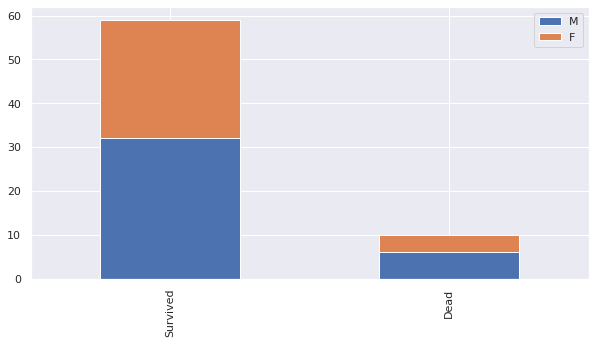

In [89]:
#survival rate of male, female
bar_chart('sex')

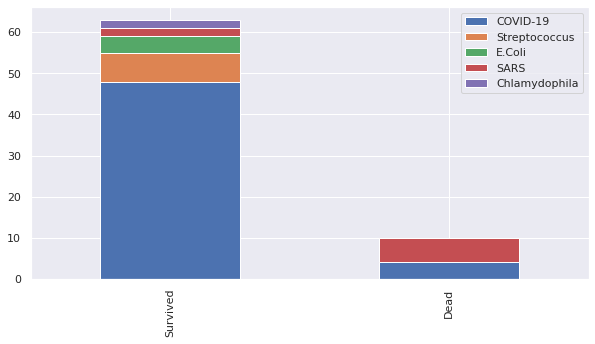

In [36]:
#survival rate of diseases
bar_chart('finding')

In [54]:
new_df['finding'].value_counts()

COVID-19         52
SARS              8
Streptococcus     7
E.Coli            4
Chlamydophila     2
Name: finding, dtype: int64

In [0]:
def bar_chart_finding(feature):
    finding1 = new_df[new_df['finding']=='COVID-19'][feature].value_counts()
    finding2 = new_df[new_df['finding']=='SARS'][feature].value_counts()
    finding3 = new_df[new_df['finding']=='Streptococcus'][feature].value_counts()
    finding4 = new_df[new_df['finding']=='E.Coli'][feature].value_counts()
    finding5 = new_df[new_df['finding']=='Chlamydophila'][feature].value_counts()
    df = pd.DataFrame([finding1, finding2, finding3, finding4, finding5])
    df.index = ['COVID-19','SARS', 'Streptococcus', 'E.Coli', 'Chlamydophila']
    df.plot(kind='bar',stacked=True, figsize=(10,5))


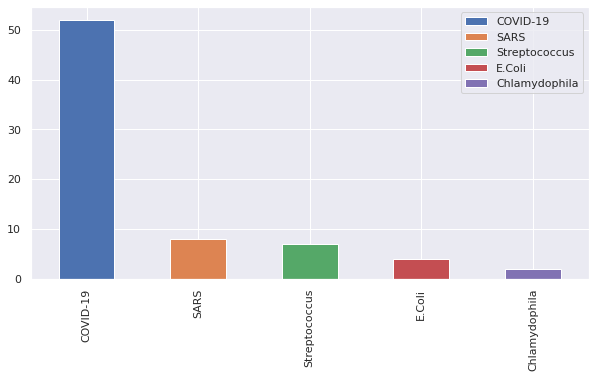

In [57]:
# number of people affected with diseases 
bar_chart_finding('finding')

In [71]:
# fill missing age with median age
new_df["age"].fillna(new_df.groupby("sex")["age"].transform("median"), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [40]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 174
Data columns (total 17 columns):
Patientid         73 non-null int64
offset            72 non-null float64
sex               69 non-null object
age               69 non-null float64
finding           73 non-null object
survival          73 non-null int64
view              73 non-null object
modality          73 non-null object
date              73 non-null object
location          59 non-null object
filename          73 non-null object
doi               51 non-null object
 url              73 non-null object
license           20 non-null object
clinical notes    73 non-null object
other notes       24 non-null object
Unnamed: 16       0 non-null object
dtypes: float64(2), int64(2), object(13)
memory usage: 10.3+ KB


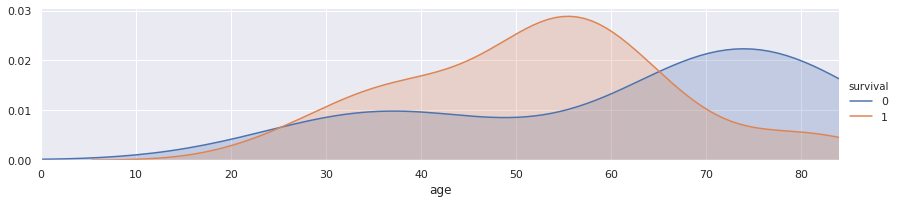

In [41]:
facet = sns.FacetGrid(new_df, hue="survival",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, new_df['age'].max()))
facet.add_legend()
 
plt.show()

(30.0, 50.0)

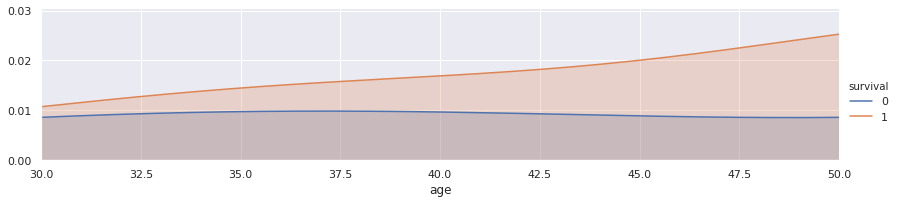

In [42]:
# survival rate where age is 30 to 50
facet = sns.FacetGrid(new_df, hue="survival",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, new_df['age'].max()))
facet.add_legend()
 
plt.xlim(30, 50)

(50.0, 60.0)

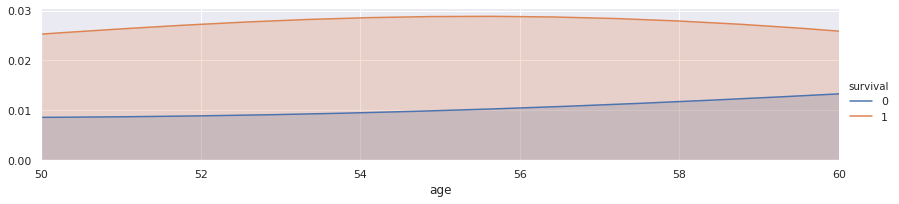

In [44]:
# survival rate where age is 50 to 60
facet = sns.FacetGrid(new_df, hue="survival",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, new_df['age'].max()))
facet.add_legend()
 
plt.xlim(50, 60)

(65.0, 85.0)

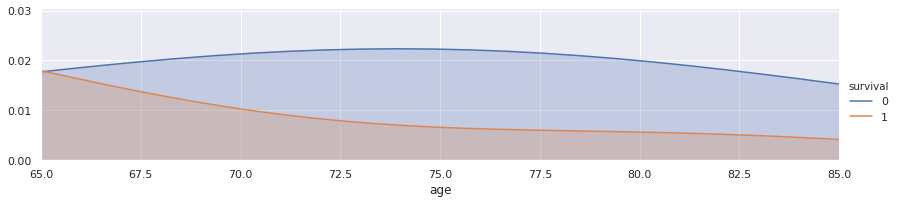

In [45]:
# survival rate where age is 65 to 85
facet = sns.FacetGrid(new_df, hue="survival",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, new_df['age'].max()))
facet.add_legend()
 
plt.xlim(65, 85)

In [46]:
new_df['age'].min()

25.0

In [47]:
new_df['age'].max()

84.0

In [49]:
#child: 0
#young: 1
#adult: 2
#mid-age: 3
#senior: 4
age_df = [new_df]
for dataset in age_df:
    dataset.loc[ dataset['age'] <= 16, 'age'] = 0,
    dataset.loc[(dataset['age'] > 16) & (dataset['age'] <= 26), 'age'] = 1,
    dataset.loc[(dataset['age'] > 26) & (dataset['age'] <= 36), 'age'] = 2,
    dataset.loc[(dataset['age'] > 36) & (dataset['age'] <= 62), 'age'] = 3,
    dataset.loc[ dataset['age'] > 62, 'age'] = 4

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


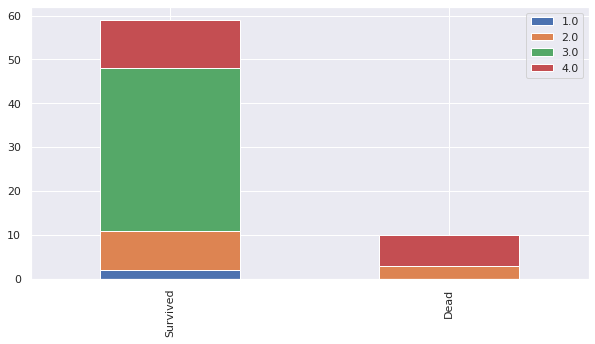

In [52]:
bar_chart('age')

In [53]:
new_df['age'].value_counts()

3.0    37
4.0    18
2.0    12
1.0     2
Name: age, dtype: int64